<a href="https://colab.research.google.com/github/hoangngo1909/Customer-Segmentation-Using-RFM-and-K-Means/blob/main/RMF_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/Machine_Learning/Customer_Segmentation/data.xlsx")

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Đếm thử số lượng dòng
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [ ]:
# Loại bỏ giá trị nan, lấy những giá trị mà CustomerID không bị nan
df_not_nan = df[df['CustomerID'].notna()]
# Sau đó lấy 10000 dòng dữ liệu để làm sample
df_not_nan = df_not_nan.sample(10000, random_state = 42)
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [ ]:
# Tính toán RFM

######## Tính R = Recently: Khách hàng nào mua hàng gần nhất thì R nhỏ, mua hàng càng lâu thì R lớn

# Chuyển từ string sang date
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Lấy ngày lớn nhất trong InvoideDate + 1

import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)

######## Tính M = Moneytary Value
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID để tính RFM
df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date - x.max()).days,
     'InvoiceNo' : 'count',
     'TotalPay' : 'sum'
     }
)


In [ ]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30


In [ ]:
df_customers.rename(columns={'InvoiceDate':'Recently', 'InvoiceNo':'Frequently', 'TotalPay':'MonetaryValue'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

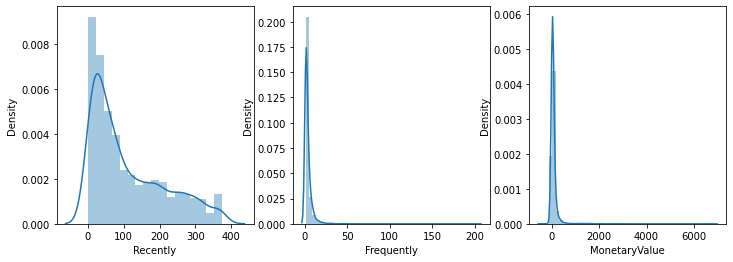

In [ ]:
# Vẽ phân phối để kiểm tra
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) # tạo 1 dòng, 3 cột

sns.distplot(df_customers['Recently'], ax = ax[0]) # vẽ vào cột đầu tiên
sns.distplot(df_customers['Frequently'], ax = ax[1]) # vẽ vào cột thứ hai
sns.distplot(df_customers['MonetaryValue'], ax = ax[2]) # vẽ vào cột thứ ba
plt.show();

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0]) # Phân bố ban đầu
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1]) # log Transformation
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0]) # srt root Transformation
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1]) # box-cox Transformation
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

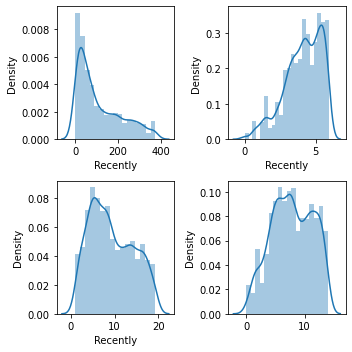

0.93
-0.72
0.32
-0.1


In [ ]:
analyze_skewness('Recently')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

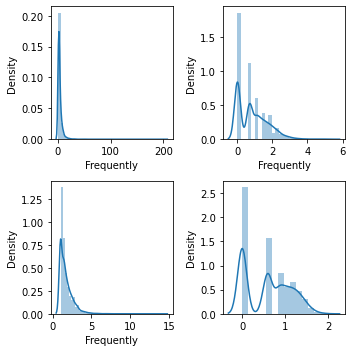

14.77
0.85
3.67
0.16


In [ ]:
analyze_skewness('Frequently')

In [ ]:
# Tiến hàng Transform dữ liệu

# Tạo 1 dữ liệu riêng để Transform mà không làm thay đổi dữ liệu gốc
df_customers_T  = pd.DataFrame()

df_customers_T['Recently'] = stats.boxcox(df_customers['Recently'])[0]
df_customers_T['Frequently'] = stats.boxcox(df_customers['Frequently'])[0]
df_customers_T['MonetaryValue'] = pd.Series(np.cbrt(df_customers['Recently'])).values


In [ ]:
df_customers_T.head()

,Recently,Frequently,MonetaryValue
0,6.152222,1.127547,3.419952
1,12.180045,0.591193,6.291195
2,4.402867,0.591193,2.668402
3,7.832068,1.127547,4.179339
4,11.907953,0.591193,6.153449


In [ ]:
# Tiến hành scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_T)

df_customers_T = scaler.transform(df_customers_T)

In [ ]:
df_customers_T = pd.DataFrame(df_customers_T).head()
df_customers_T.rename(columns={'0':'Recently', '1':'Frequently', '2':'MonetaryValue'}, inplace = True)
df_customers_T.head()


,0,1,2
0,-0.493794,1.012426,-0.533456
1,1.232949,-0.017412,1.262754
2,-0.994917,-0.017412,-1.003616
3,-0.012582,1.012426,-0.058394
4,1.155005,-0.017412,1.176583


In [ ]:
from sklearn.cluster import KMeans

[8070.000000000001, 3690.30411384244, 2539.2179301418555, 1834.3390418663635, 1415.4640810463752, 1146.6085528441276, 952.8240773803387, 812.0304105238012, 714.572432489868, 624.4268130440435]


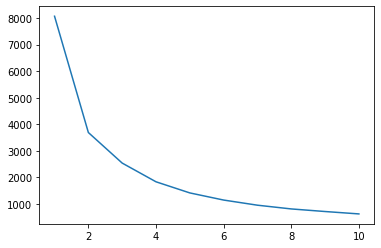

In [ ]:
# Chọn K cluster bằng thuật toán Elbow

k_rng = range(1, 11) #10 gia tri k
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df_customers_T)
  sse.append(km.inertia_)

print(sse)
plt.plot(k_rng, sse)

In [ ]:
# Áp dụng model K-Means vào bài toán phân cụm khách hàng
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_customers_T)
y_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_customers['Cluster'] = y_predicted
df_customers.head()

,Recently,Frequently,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,5,133.20,0
12348.0,249,2,120.88,1
12349.0,19,2,312.75,0
12352.0,73,5,80.85,0
12354.0,233,2,33.30,1


In [ ]:
# Đặc trưng của các cụm khách hàng
df_customers.groupby('Cluster').agg(
    {
        'Recently': 'mean',
        'Frequently': 'mean',
        'MonetaryValue': 'mean'
    }
).round(2)


,Recently,Frequently,MonetaryValue
Cluster,,,
0,29.88,7.40,145.45
1,223.12,1.99,40.10
2,56.46,1.40,27.99
